In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sample_space = 1_000_000 #ความเป็นไปได้จากตัวเลขทั้งหมด 6 หลัก
prizes = [6_000_000,200_000,80_000,40_000,20_000,100_000,4000,4000,2000] #จำนวนเงินที่ได้ของแต่ละรางวัล
n_prize = [1,5,10,50,100,2,2000,2000,10_000] #จำนวนรางวัลของแต่ละรางวัล
probabilities = [x/sample_space for x in n_prize] #โอกาสชนะของแต่ละรางวัล

ticket_price = 80 #ราคาสลากกินแบ่ง

In [25]:
probabilities

[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 2e-06, 0.002, 0.002, 0.01]


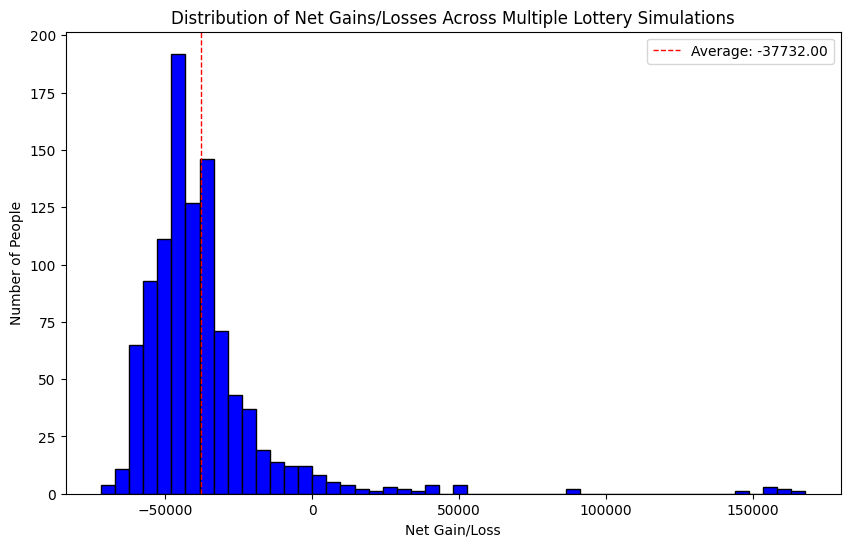

In [30]:
# Simulation parameters
n_simulations_per_person = 1000  # Number of lottery tickets each person buys
n_people = 1000  # Number of people

# Simulate the lottery for each person
results = []

for _ in range(n_people):
    total_gain = 0
    for _ in range(n_simulations_per_person):
        total_prizes = 0
        for prize, prob in zip(prizes, probabilities):
            if np.random.random() < prob:
                total_prizes += prize
        net_gain = total_prizes - ticket_price
        total_gain += net_gain
    results.append(total_gain)

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Net Gains/Losses Across Multiple Lottery Simulations')
plt.xlabel('Net Gain/Loss')
plt.ylabel('Number of People')
plt.axvline(np.mean(results), color='red', linestyle='dashed', linewidth=1, label=f'Average: {np.mean(results):.2f}')
plt.legend()
plt.show()


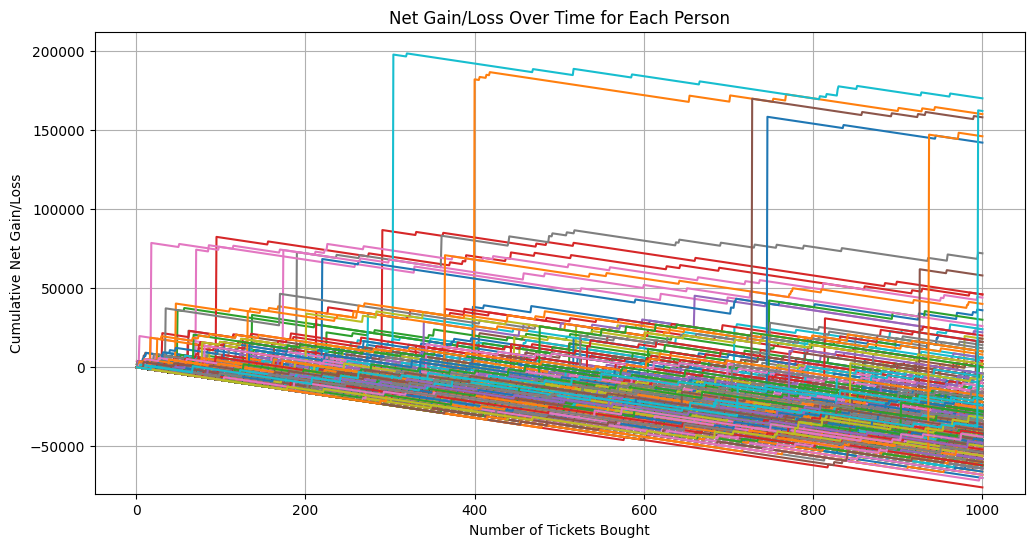

In [22]:
# Simulation parameters
n_simulations_per_person = 1000  # Number of lottery tickets each person buys
n_people = 1000  # Number of people to plot

# Initialize a DataFrame to store the results
df = pd.DataFrame(index=range(1, n_simulations_per_person + 1))

# Simulate the lottery for each person
all_results = []
final_results = []
for i in range(n_people):
    cumulative_gains = []
    total_gain = 0
    for _ in range(n_simulations_per_person):
        total_prizes = 0
        for prize, prob in zip(prizes, probabilities):
            if np.random.random() < prob:
                total_prizes += prize
        net_gain = total_prizes - ticket_price
        total_gain += net_gain
        cumulative_gains.append(total_gain)
    all_results.append(cumulative_gains)
    # Convert the results to a DataFrame
    final_results.append(total_gain)
    
df = pd.DataFrame(final_results, columns=['Final_Gain_Loss'], index=[f'Person_{i}' for i in range(1, n_people + 1)])

# Plot the results
plt.figure(figsize=(12, 6))

for i, gains in enumerate(all_results):
    plt.plot(range(1, n_simulations_per_person + 1), gains, label=f'Person {i + 1}')

center_value = -40000
y_min = center_value - 40000  # Adjust as needed
  # Adjust as needed
plt.ylim(y_min)

plt.title('Net Gain/Loss Over Time for Each Person')
plt.xlabel('Number of Tickets Bought')
plt.ylabel('Cumulative Net Gain/Loss')
plt.grid(True)
plt.show()


<Axes: ylabel='Frequency'>

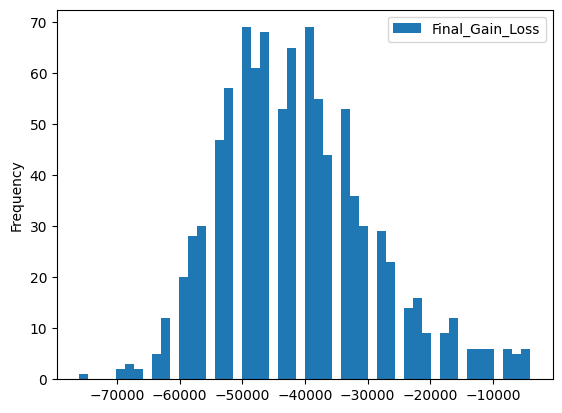

In [23]:
df.query('Final_Gain_Loss < 0').plot(kind='hist',bins=50)

In [37]:
df['Final_Gain_Loss'].describe()

count      1000.000000
mean     -37818.000000
std       22591.530565
min      -76000.000000
25%      -50000.000000
50%      -42000.000000
75%      -32000.000000
max      170000.000000
Name: Final_Gain_Loss, dtype: float64

In [39]:
df['Final_Gain_Loss'].mean()/1000

-37.818

<Axes: >

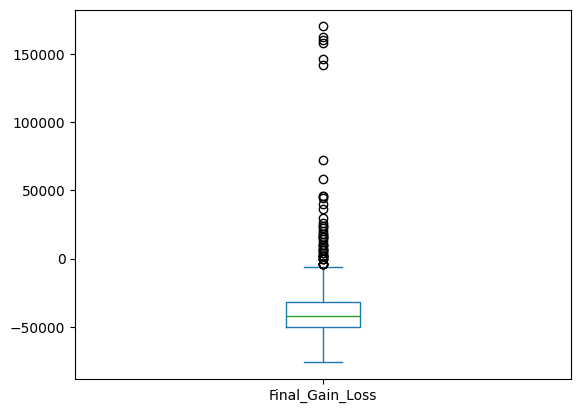

In [40]:
df['Final_Gain_Loss'].plot(kind='box')

In [ ]:
# Simulation parameters
n_simulations_per_person = 1000  # Number of lottery tickets each person buys
n_people = 1000000  # Number of people to plot

# Simulate the lottery for each person
all_results = []
# final_results = []

for i in range(n_people):
    cumulative_gains = []
    total_gain = 0
    for _ in range(n_simulations_per_person):
        total_prizes = 0
        for prize, prob in zip(prizes, probabilities):
            if np.random.random() < prob:
                total_prizes += prize
        net_gain = total_prizes - ticket_price
        total_gain += net_gain
        cumulative_gains.append(total_gain)
    all_results.append(cumulative_gains)
    # Convert the results to a DataFrame
    # final_results.append(total_gain)
    
# df = pd.DataFrame(final_results, columns=['Final_Gain_Loss'], index=[f'Person_{i}' for i in range(1, n_people + 1)])

# Plot the results
plt.figure(figsize=(12, 6))

for i, gains in enumerate(all_results):
    plt.plot(range(1, n_simulations_per_person + 1), gains, label=f'Person {i + 1}')

center_value = -40000
y_min = center_value - 40000  # Adjust as needed
y_max = center_value + 80000  # Adjust as needed
plt.ylim(y_min, y_max)

plt.title('Net Gain/Loss Over Time for Each Person')
plt.xlabel('Number of Tickets Bought')
plt.ylabel('Cumulative Net Gain/Loss')
plt.grid(True)
plt.show()